# This project implemented by Elham Mahdipour
## She is a Ph.D. Candidate of computer engineering at Yazd University, Yazd, Iran.
### Please feel free and contact to me: elham.mahdipour@gmail.com/ elham.mahdipour@stu.yazd.ac.ir

# Phase 1 
## Create Dataset and Preprocessing

In [1]:
import networkx as nx
G1=nx.read_leda('biogrid samples\scerevisiae.gw')
G1

In [2]:
G2=nx.read_leda('biogrid samples\AThaliana.gw')
G2

In [3]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

5831
5897


In [4]:
G_target_na=nx.read_weighted_edgelist('biogrid samples\sc-AT.tsv')
G_target_na  

In [5]:
len(G_target_na)

1440

In [6]:
ed1=G1.edges()
ed2=G2.edges()

nd1=G1.nodes()
nd2=G2.nodes()

el1=list(ed1)
el2=list(ed2)

nd1=list(nd1)
nd2=list(nd2)

degG1 = [val for (node, val) in G1.degree()]
degG2 = [val for (node, val) in G2.degree()]

# Feature Extraction

# compute score for create similarity matrix

In [7]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [8]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [9]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [10]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node

In [11]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [12]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [16]:
elt=G_target_na.edges()
elt=list(elt)
elt

[('850996', '833987'),
 ('854309', '834370'),
 ('850997', '840114'),
 ('850998', '819918'),
 ('855386', '829969'),
 ('851342', '844228'),
 ('853757', '821995'),
 ('855723', '831311'),
 ('852439', '820937'),
 ('855104', '834747'),
 ('852383', '832836'),
 ('851954', '829838'),
 ('851065', '831077'),
 ('852456', '843098'),
 ('851098', '825755'),
 ('851102', '814698'),
 ('851582', '837733'),
 ('855474', '817673'),
 ('852665', '826665'),
 ('855428', '821628'),
 ('853371', '817259'),
 ('856402', '837734'),
 ('856413', '825385'),
 ('851117', '830044'),
 ('854986', '839636'),
 ('851125', '825833'),
 ('851631', '835714'),
 ('854025', '844399'),
 ('856815', '820218'),
 ('854070', '839916'),
 ('856434', '819849'),
 ('852231', '820293'),
 ('851139', '828392'),
 ('856462', '836220'),
 ('856466', '839521'),
 ('856467', '824778'),
 ('856473', '841952'),
 ('856474', '826596'),
 ('851114', '823849'),
 ('856844', '844406'),
 ('854930', '835835'),
 ('850505', '837023'),
 ('850369', '830541'),
 ('854844',

In [45]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=(nd1[i],nd2[j]) in elt
            if q1==False:
                c=0
            else:
               # print(q1)
                c=1
            seq[i][j]=c    
            
    return seq

In [46]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s,coeff_pr, dd, cd, seq_sc

In [47]:
import numpy as np
m, coeff_pr, dd, cd, seq=compute_score(G1,G2)
sim=m

# Phase 2: Dataset Generation

# create data for deep learning

# change problem to classification 
## [node of G1, node of G2, Sequence similarity, Coefficient page rank, clustering coefficient difference,  similarity score, alignment=yes(0)/TN or no(1)/TP]

In [60]:
# en_mat is encoding matrix
en_mat=[]

for i in range(len(nd1)):
    for j in range(len(nd2)):
        if G_target_na.has_edge(nd1[i],nd2[j]):
            align_class='Yes'
        else:
            align_class='No'
        
        sample=[int(nd1[i]),int(nd2[j]), seq[i][j], coeff_pr[i][j], dd[i][j],cd[i][j],sim[i][j],align_class] 
        en_mat.append(sample)
print(len(en_mat))

34385407


In [61]:
yc=[]
noc=[]
for i in range(len(en_mat)):
    if en_mat[i][7]=='Yes':
        yc.append(en_mat[i])
    else:
        noc.append(en_mat[i])
print(len(yc), len(noc))

265 34385142


In [62]:
data=yc+noc 
len(data)
X=[]
y=[]
for i in range(len(data)):
    X.append(data[i][0:7])
    y.append(data[i][7])

len(X),len(y)

(34385407, 34385407)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [22]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

30946866 30946866 3438541 3438541


In [94]:
x_tr,y_tr,x_te,y_te=X_train, y_train,X_test,y_test

In [94]:
import pandas as pd
f=pd.DataFrame(en_mat,columns=['node_of_G1','node_of_G2', 'Sequence_Similarity','Coefficient_pagerank','Degree_Difference', 'clustering_coefficient_difference', 'similarity_score', 'alignment_class'])
f.head()

,node_of_G1,node_of_G2,Sequence_Similarity,Coefficient_pagerank,Degree_Difference,clustering_coefficient_difference,similarity_score,alignment_class
0,9164920,839248,0.0,0.671633,0.500000,0.686080,0.195621,No
1,9164920,839798,0.0,0.098354,0.857143,0.852643,0.148208,No
2,9164920,839799,0.0,0.277256,0.928571,0.982497,0.090061,No
3,9164920,839241,0.0,0.843618,0.222222,0.872006,0.196793,No
4,9164920,832578,0.0,0.147593,0.857143,0.289062,0.256000,No


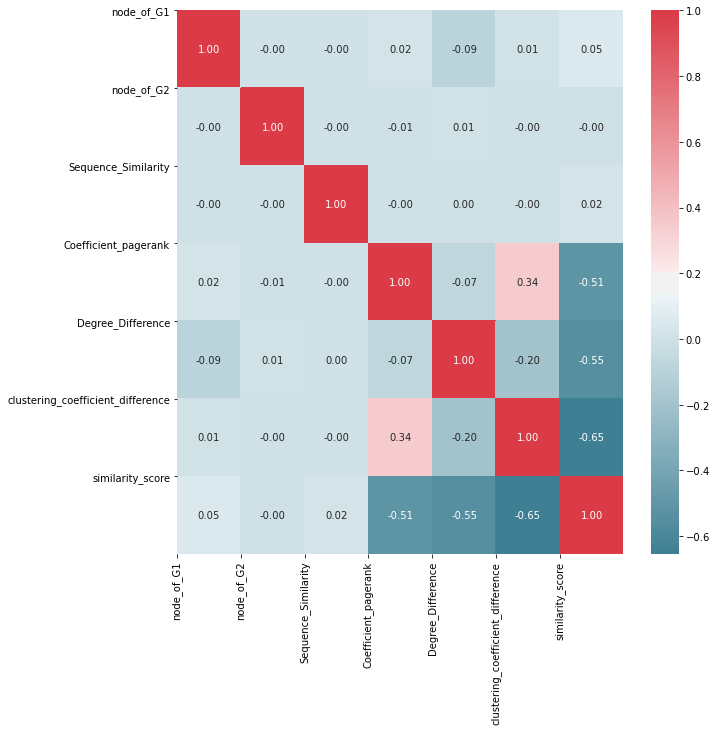

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#f=pd.DataFrame(X_train)
corr = f.corr()
   #Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

# Solve data Imbalance problem

# Resample 

In [72]:
from collections import Counter
from imblearn.combine import SMOTEENN

print('Original dataset shape %s' % Counter(y_train))
#sampling_strategy = 'not minority'
smt = SMOTEENN(random_state=42) #sampling_strategy=sampling_strategy)

X_res_train, y_res_train = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res_train))   

Original dataset shape Counter({'No': 30946622, 'Yes': 244})
Resampled dataset shape Counter({'Yes': 30946521, 'No': 30670343})


In [73]:
print('Original dataset shape %s' % Counter(y_test))
smt = SMOTEENN(random_state=42)
X_res_test, y_res_test = smt.fit_resample(X_test, y_test)
print('Resampled dataset shape %s' % Counter(y_res_test))  

Original dataset shape Counter({'No': 3438520, 'Yes': 21})
Resampled dataset shape Counter({'Yes': 3438519, 'No': 3387561})


In [74]:
import numpy as np
X_res_train=np.array(X_res_train)
y_res_train=np.array(y_res_train)
X_res_test=np.array(X_res_test)
y_res_test=np.array(y_res_test)

In [75]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_res_train)
encoded_Y = encoder.transform(y_res_train)
# One Hot Encode
y_res_train = np_utils.to_categorical(encoded_Y)

In [76]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_res_test)
encoded_Y = encoder.transform(y_res_test)
# One Hot Encode
y_res_test = np_utils.to_categorical(encoded_Y)

# test model for real data

In [79]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# One Hot Encode
y_train = np_utils.to_categorical(encoded_Y)

In [80]:
# Label encode Class (Species)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# One Hot Encode
y_test = np_utils.to_categorical(encoded_Y)

In [81]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

# Phase 3: Architecture of R-NA Network

# Train model with resample

In [108]:
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding
import keras

callbacks_list = [keras.callbacks.EarlyStopping(monitor='acc',patience=1,),
keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_loss',save_best_only=True,)]
#del model_rnn
model_rnn = Sequential()

model_rnn.add(layers.Embedding(7, 8))
model_rnn.add(layers.SimpleRNN(4))
model_rnn.add(Dense(2, activation='softmax'))
model_rnn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc','mae','mse'])
model_rnn.summary()
history_rnn = model_rnn.fit(X_res_train, y_res_train,epochs=3,validation_split=0.2, callbacks=callbacks_list)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 8)           56        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 4)                 52        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 49293491 samples, validate on 12323373 samples
Epoch 1/3
49293491/49293491 [==============================] - 9526s 193us/step - loss: 1.4605e-04 - acc: 1.0000 - mae: 1.3351e-04 - mse: 1.9857e-05 - val_loss: 1.0490e-05 - val_acc: 1.0000 - val_mae: 1.0487e-05 - val_mse: 1.0939e-10
Epoch 2/3
49293491/49293491 [==============================] - 9399s 191us/step - loss: 5.9749e-06 - acc: 1.0000 - mae: 5.9743e-06 - mse: 3.8100e-11 - val_loss: 6.6757e-06 - val_acc: 1.0000 - val_mae: 6.6757e-06 - val_mse: 4.4666e-11
Epoch 3/3
49293491/49293491 [==============================] - 9268s 188us/step - loss: 4.7251e-06 - acc: 1.0000 - mae: 4.7221e-06 - mse: 2.3535e-11 - val_loss: 5.6028e-06 - val_acc: 1.0000 - val_mae: 5.5889e-06 - val_mse: 3.1142e-11


In [109]:
# save model
import h5py
model_rnn.save('biogrid samples/deep_model_resample_RNN_SC-AT.h5')
model_rnn.save_weights('biogrid samples/deep_model_resample_RNN_weights_SC-AT.h5')

## test tune model for real data

In [85]:
from keras.models import load_model
#del model_rnn
model_rnn = load_model('biogrid samples/deep_model_resample_RNN_SC-AT.h5') 
model_rnn.load_weights('biogrid samples/deep_model_resample_RNN_weights_SC-AT.h5', by_name=True) 

C:\Users\ASUS\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [110]:
# without resample
result_trn = model_rnn.evaluate(X_train, y_train)
result_trn

30946866/30946866 [==============================] - 2336s 75us/step


[3.576288298362099e-06, 1.0, 3.5728087368624983e-06, 1.2716429471926194e-11]

In [111]:
%%time
out_trn=model_rnn.predict(X_train)
out_trn

Wall time: 18min 58s


array([[9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06],
       ...,
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06]], dtype=float32)

In [112]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train.argmax(axis=1), out_trn.argmax(axis=1)))

[[30946622        0]
 [       0      244]]


In [113]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(precision_score(y_train.argmax(axis=1), out_trn.argmax(axis=1) , average="macro"))
print(recall_score(y_train.argmax(axis=1), out_trn.argmax(axis=1) , average="macro"))
print(f1_score(y_train.argmax(axis=1), out_trn.argmax(axis=1) , average="macro"))

1.0
1.0
1.0


In [114]:
# without resample
result_ten = model_rnn.evaluate(X_test, y_test)
result_ten

3438541/3438541 [==============================] - 265s 77us/step


[3.576284696694561e-06, 1.0, 3.55425208908855e-06, 1.2629200636660176e-11]

In [115]:
%%time
out_ten=model_rnn.predict(X_test)
out_ten

Wall time: 2min 3s


array([[9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06],
       ...,
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06],
       [9.9999642e-01, 3.5356209e-06]], dtype=float32)

In [116]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.argmax(axis=1), out_ten.argmax(axis=1)))

[[3438520       0]
 [      0      21]]


In [117]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(precision_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))
print(recall_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))
print(f1_score(y_test.argmax(axis=1), out_ten.argmax(axis=1) , average="macro"))

1.0
1.0
1.0
